# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Bernard Tan
### Preferred Name (if different): Bernard
### Student ID: 015215317
### Email address: bernard.tan@sjsu.edu


##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [2]:
# Citation :
# 1. From Canvas Project Example (Jupyter Notebook, DecisionTrees.Breast.ipynb)
# 2. https://pbpython.com/categorical-encoding.html (One Hot Encoding Guidance, from Assignment pdf)

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [3]:
np.random.seed(2)

#### Code the solution

In [4]:
# Load Dataset

df = pd.read_csv (r'homework5_input_data.csv')

Y = df ['Class']
X = df.drop (['Class'], axis = 1)

target = ['e', 'p']

In [5]:
# Convert Categorical Variable to Numeric (X only, using One Hot Encoding)

X_ohe = pd.get_dummies (X, columns = X.columns, prefix = X.columns)

In [6]:
# Break the data into the training and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X_ohe, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((82875, 4868), (82875,), (20719, 4868), (20719,))

In [7]:
# Train a decision tree model (5-fold cross-validation)

model = DecisionTreeClassifier(random_state=0)

cvs = cross_val_score(model, X_train, Y_train, cv=5)


# Report Accuracies

print('Individual Cross-Validation Accuracies : ')
print (cvs)
print('Mean Cross-Validation Accuracies : ')
print (cvs.mean())

Individual Cross-Validation Accuracies : 
[0.79909502 0.79831071 0.79939668 0.79360483 0.7986727 ]
Mean Cross-Validation Accuracies : 
0.7978159879336351


In [8]:
# Train a decision tree model 

model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


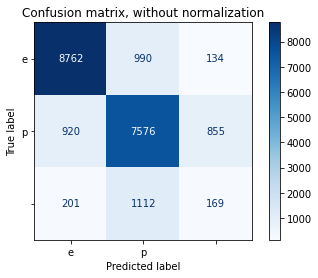

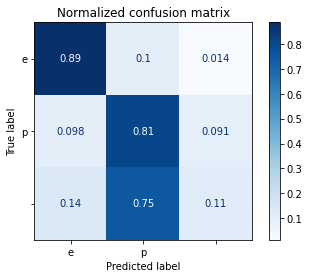

In [9]:
# Plot two confusion matrices for test set predictions

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels= target,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

   

plt.show()